In [ ]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-qbg8ykwb
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-qbg8ykwb
     |████████████████████████████████| 596 kB 25.9 MB/s 
     |████████████████████████████████| 42 kB 901 kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5-py3-none-any.whl size=65351 sha256=82f064993bef00b5fd2ca5f4301995dc20abcb089fefd829b68afa0456b1e8da
  Stored in directory: /tmp/pip-ephem-wheel-cache-mn92jbul/wheels/24/1d/09/8167de727fe5b74f832b6fcb5d9069d8f03ca29f337bfe484d
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31549 sha256=61e5f0a7181231024fbae0aa1d2763da122da1b349d58c6ecd0ee3227fae5d8c
  Stored in directory: /root/.cache/pip/wheels/aa/cc/ed/ca4e88beef6

'1.12.0+cu113'

In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
!ls train | wc -l
!ls test | wc -l

520
350


In [ ]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader

import os
os.chdir('/content/drive/MyDrive/colab')

register_coco_instances("train", {}, "label(polygon)_train.json", "train_multi1")
register_coco_instances("test", {}, "test.json", "test_multi1")

data_metadata = MetadataCatalog.get("train")
dataset_dicts = DatasetCatalog.get("train")

In [ ]:
data_metadata

Metadata(evaluator_type='coco', image_root='train_multi1', json_file='label(polygon)_train.json', name='lg_train', thing_classes=['Normal'], thing_dataset_id_to_contiguous_id={1: 0})

In [ ]:
os.chdir('/content/detectron2_repo')
%mkdir checkpoint
%cd checkpoint

!gdown --id <google_drive_fileID>

In [ ]:
#0801

#from detectron2.data.datasets.coco import register_coco_instances
#import os
#
#def register_custom_datasets():
#    DATASET_ROOT = "/content/drive/MyDrive/InstanceSegmentTest/dataset/"
#    ANN_ROOT = os.path.join(DATASET_ROOT, "")
#    TRAIN_PATH = os.path.join(DATASET_ROOT, "train_multi1/")
#    VAL_PATH = os.path.join(DATASET_ROOT, "test_multi1l/")
#    TRAIN_JSON = os.path.join(ANN_ROOT, "label(polygon)_train.json")
#    VAL_JSON = os.path.join(ANN_ROOT, "test.json")
#    register_coco_instances("train", {}, TRAIN_JSON, TRAIN_PATH)
#    register_coco_instances("test", {}, VAL_JSON, VAL_PATH)
#
#register_custom_datasets()

!python lazyconfig_train_net.py --config-file /content/detectron2_repo/configs/new_baselines/mask_rcnn_R_101_FPN_100ep_LSJ.py --num-gpus 0

[08/02 07:03:02 detectron2]: Rank of current process: 0. World size: 1
[08/02 07:03:04 detectron2]: Environment info:
----------------------  ----------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.6 @/content/detectron2_repo/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.12.0+cu113 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           Yes
GPU 0                   Tesla T4 (arch=7.5)
Driver version          460.32.03
CUDA_HOME               /usr/local/cuda
Pillow                  7.1.2
torchvision             0.13.0+cu113 @/usr/local/lib/python3.7/dist-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5, 8.0, 8.6
fvcore                  0.1

In [ ]:
test_metadata = MetadataCatalog.get('test')

In [ ]:
test_metadata, data_metadata

(Metadata(evaluator_type='coco', image_root='test_multi1', json_file='lg_test.json', name='lg_test', thing_classes=['Normal'], thing_dataset_id_to_contiguous_id={1: 0}),
 Metadata(evaluator_type='coco', image_root='train_multi1', json_file='label(polygon)_train.json', name='lg_train', thing_classes=['Normal'], thing_dataset_id_to_contiguous_id={1: 0}))

In [ ]:
d = dataset_dicts[256]
print(d["file_name"])  

train_multi1/0169.jpg


[07/30 11:15:39 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,64,1,1)        |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,8,3,3)         |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

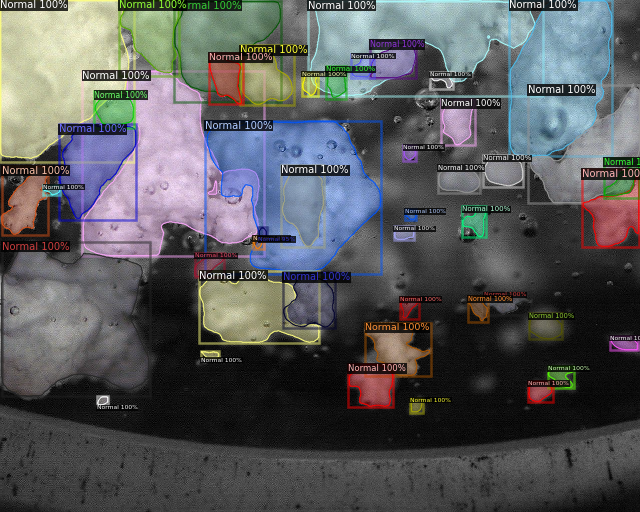

In [ ]:
#예측 데이터
import random 
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

from detectron2.utils.visualizer import ColorMode

cfg.MODEL.WEIGHTS = os.path.join('/content/drive/MyDrive/InstanceSegmentTest/dataset/output',"model_final.pth")  
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2  
predictor = DefaultPredictor(cfg)

im = cv2.imread('/content/drive/MyDrive/InstanceSegmentTest/dataset/train/0169.jpg')
outputs = predictor(im)  
v = Visualizer(im[:, :, ::-1],
               metadata=test_metadata, 
               scale=0.5, 
               instance_mode=ColorMode.IMAGE_BW   
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# 정답 데이터 
img = cv2.imread('/content/drive/MyDrive/InstanceSegmentTest/dataset/train_multi1/0169.jpg')
visualizer = Visualizer(img[:, :, ::-1], metadata=lg_chem_data_metadata, scale=0.5)
vis = visualizer.draw_dataset_dict(d)
cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
os.getcwd()

'/content/drive/MyDrive/InstanceSegmentTest/dataset'

In [ ]:
os.chdir('/content/drive/MyDrive/InstanceSegmentTest/dataset')

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("test", cfg, False, output_dir="./output_test_(3)/")
val_loader = build_detection_test_loader(cfg, "test")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [07/30 11:11:41 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[07/30 11:11:41 d2.data.datasets.coco]: Loaded 350 images in COCO format from lg_test.json
[07/30 11:11:41 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|   Normal   | 0            |
|            |              |
[07/30 11:11:41 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[07/30 11:11:41 d2.data.common]: Serializing 350 elements to byte tensors and concatenating them all ...
[07/30 11:11:41 d2.data.common]: Serialized dataset takes 0.03 MiB
[07/30 11:11:41 d2.evaluation.evaluator]: Start inference on 350 batches
[07/30 11:11:48 d2.evaluation.evaluator]: Inference done 11/350. Dataloading: 0.2780 s/iter. Inference: 0.1003 s/

OrderedDict()

In [ ]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST

0.2

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("data_val", output_dir="./output_val")
val_loader = build_detection_test_loader(cfg, "data_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

[07/26 15:52:23 d2.data.datasets.coco]: Loaded 312 images in COCO format from lg_val.json
[07/26 15:52:23 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[07/26 15:52:23 d2.data.common]: Serializing 312 elements to byte tensors and concatenating them all ...
[07/26 15:52:23 d2.data.common]: Serialized dataset takes 10.33 MiB
[07/26 15:52:23 d2.evaluation.evaluator]: Start inference on 312 batches
[07/26 15:52:27 d2.evaluation.evaluator]: Inference done 11/312. Dataloading: 0.0012 s/iter. Inference: 0.0820 s/iter. Eval: 0.2280 s/iter. Total: 0.3112 s/iter. ETA=0:01:33
[07/26 15:52:32 d2.evaluation.evaluator]: Inference done 26/312. Dataloading: 0.0015 s/iter. Inference: 0.0843 s/iter. Eval: 0.2456 s/iter. Total: 0.3316 s/iter. ETA=0:01:34
[07/26 15:52:37 d2.evaluation.evaluator]: Inference done 41/312. Dataloading: 0.0016 s/iter. Inference: 0.0851 s/iter. Eval: 0.2531 s/ite